# Lab 1
Hara Kumar (19940905-3676)
Yeongwoo Kim (19890909-7753)

In [20]:
import numpy as np
import maze as mz 
import pandas as pd

# Problem 1: The Maze and the Random Minotaur

The objective is to escape the maze before time T and without getting caught by the minotaur. We start first by describing the maze as a numpy array. 

In [22]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

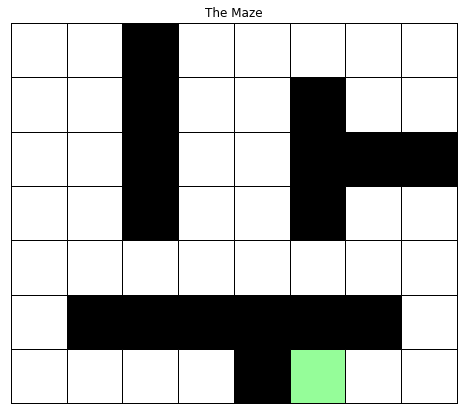

In [23]:
mz.draw_maze(maze)

## MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and the minotaur in the maze. Note that we exclude states where the player is on an obstacles' position since this is an impossible state. We do, however, permit the player to be in the same position as the minotaur, as this possible (the reward for this state will reflect the fact that this is an undesirable state.

$$\mathcal{S} = \big\lbrace (i_a,j_a,i_m,j_m):\textrm{such that the cell
} (i_a,j_a) \textrm{ is not an obstacle}\big\rbrace.$$
> **Note:** $\mathcal i_a and j_a$ represents the position of the agent. $\mathcal i_m and j_m$ represents the position of the minotaur.

#### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). To prevent duplicate state spaces, actions that would result in the agent encountering a wall or obstacle is excluded from the action space. 
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up if }(i_a,(j_a + 1)) \neq \textrm{obstacle or wall}, \\ \textrm{ down if } (i_a,(j_a - 1)) \neq \textrm{obstacle or wall}, \\ \textrm{ left if } ((i_a - 1),j_a) \neq \textrm{obstacle or wall}, \\ \textrm{ right if } ((i_a + 1),j_a) \neq \textrm{obstacle or wall}, \\ \textrm{ stay} \rbrace.$$

#### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. As a consequence, the transition probabilities are deterministic. More precisely,   
- If at state (or position) $s$ taking action (or move) $a$ does not lead to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s' \vert s, a) = 1$. 
- If at state (or position)  $s$ taking action (or move) $a$ leads to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s \vert s, a) = 1$.

> **Note**: Recall that for a fixed $s \in \mathcal{S}$ and $a \in \mathcal{A}$ we have $\sum_{s' \in \mathcal{S}} \mathbb{P}(s' \vert s, a) = 1$, thus if for some $s' \in \mathcal{S}$  we have $\mathbb{P}(s' \vert s, a) = 1$, then for all $s'' \in \mathcal{S} \backslash \lbrace s'\rbrace$ we have $\mathbb{P}(s'' \vert s, a) = 0$,

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles and the minotaur.    
   - If at state $s$, taking action $a$, leads to a wall, obstacle, or the minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle nor the minotaur, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit (without a minotaur) then $r(s ,a) = 0$. 
> **Note**: Here the rewards are independent of time (i.e. $r_t(.,.) = r(.,.)$). 


### Implementation
The above MDP formulation is implemented as a class ``maze.Maze`` in the file [maze.py](./maze.py) which given a matrix description of the maze instanciates the state space, action space, transition probabilities and rewards. 

> **Note:** In the class `maze.Maze` each state $s = (i,j)$ is given a unique identifier $s_{id} \in \lbrace 0, , \dots, \vert S \vert -1 \rbrace$. In other words, the state space from an implementation perspective is viewed as the set of integers $\lbrace 0, , \dots, \vert S \vert -1 \rbrace$. This mapping is done via the dictionary `self.map` and its inverse mapping via the dictionary `self.states`.   

In [31]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.



In [28]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

In [29]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path = env.simulate(start, policy, method);

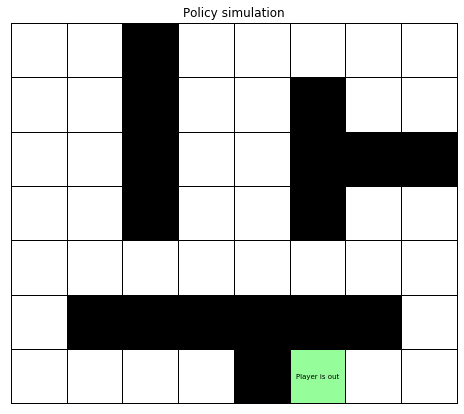

In [30]:
# Show the shortest path 
mz.animate_solution(maze, path)

## Value Iteration

Here we solve the discounted infinite-horizon MDP problem using value iteration, the objective here is to find a stationary policy $\pi$ that minimizes the infinite horizon objective with a discount factor $\gamma$ 
$$
    \mathbb{E} \Big[\sum_{t=0}^\infty \gamma^t r\big(s_t, \pi(s_t)\big) \Big].
$$
Recall the Bellman equation in the case of a stationary policy $\pi$ 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V^*(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V^*(s') \Big\rbrace
\end{equation}
or equivalently in terms of the Bellman operator $\mathcal{L}$ 
\begin{equation}
V^* =  \mathcal{L}(V^*)
\end{equation}
where 
\begin{equation}
   \forall s \in \mathcal{S} \qquad  \mathcal{L}(V)(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V(s') \Big\rbrace. 
\end{equation}
Value iteration solves the Bellman equation described above. This method is implemented as `maze.value_iteration` in the file [maze.py]().

> **Note:** Recall that the mapping $\mathcal{L}$ is a contraction, therefore value iteration converges. To achieve an $\varepsilon>0$ approximation (i.e. $\Vert V^* - V_{n+1} \Vert \le \varepsilon$),
 the stopping criterion of value iteration is $\Vert V - \mathcal{L}(V) \Vert < \frac{1-\gamma}{\gamma}\varepsilon$.

In [8]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

In [9]:
method = 'ValIter';
start  = (0,0);
path = env.simulate(start, policy, method)

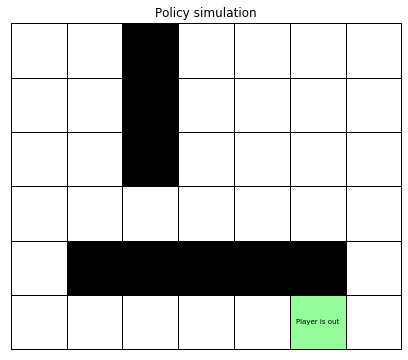

In [10]:
# Show the shortest path 
mz.animate_solution(maze, path)

## Random rewards 

### The new MDP formulation 
As stated in the problem statement, we only modify the rewards $\mathcal{R}$ to be random. In fact we will only need to modify the rewards corresponding to the state action pair $(s,a)$ that lead to either the cell R1 or R2.
#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to the cell R1 then the reward is random according to the following     $$ R(s,a) = \begin{cases}
            -7 \quad \textrm{ w.p. } 0.5 \\
            -1 \quad \textrm{ w.p. } 0.5
            \end{cases} 
     $$
   - If at state $s$, taking action $a$, leads to the cell R2 then the reward is random according to the following 
     $$ R(s,a) = \begin{cases}
            -2 \quad \textrm{ w.p. } 0.5 \\
            -1 \quad \textrm{ w.p. } 0.5
            \end{cases} 
     $$
   - The remaining rewards remain deterministic and with the same values as in the previous formulation.

> **Note**: The fact that you stay in a cell for a number of rounds $n$ means that you are forced to incur the reward of ending up in that state for an additional $n$ times. Thus, instead of modifying the transition probabilities, we can modify the reward of ending up at that round by multiplying it by $n + 1$.  

### Solving the new MDP 
As mentioned in the appendix [random_rewards.pdf]() (see in canvas), when solving the problem we will only have to look at the average rewards instead of the realization of the rewards, and the methods implemented for the previous case remain unchanged.  

> **Note**: In the implementation, the only change will be the rewards. In addition, the policies we obtain remain deterministic. However, when running a policy the accumulated reward is random, but its average over multiple repetitions should converge to the value function. 

In [11]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 0, 0, 0, 0, -1],
    [ 0, 1, 1, 1, 1, 1,  0],
    [-6, 0, 0, 0, 0, 2,  0]
])
# with the convention 
#  0 = empty cell
#  1 = obstacle
#  2 = exit of the Maze
# -n = trapped cell with probability 0.5. If the cell is trapped the player must stay there for n times.  

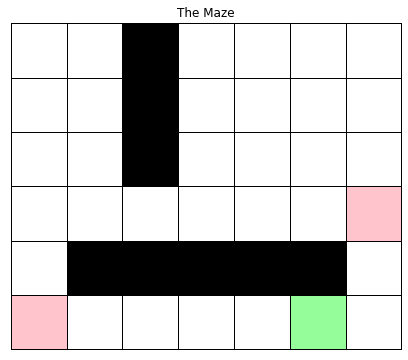

In [12]:
mz.draw_maze(maze);

### Dynamic programming 

Run the following python code to obtain the optimal solution of the newly formulated MDP with dynamic programming. 

In [13]:
# Create an environment maze
env = mz.Maze(maze, random_rewards=True)
# env.show()

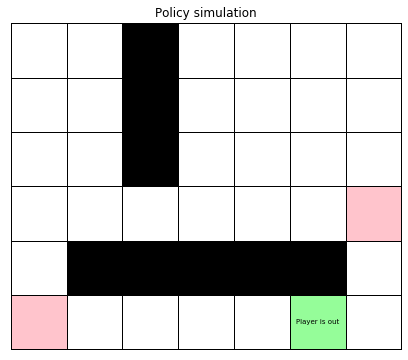

In [14]:
# Finite horizon
horizon = 15
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path = env.simulate(start, policy, method);
# Show the shortest path 
mz.animate_solution(maze, path)

> **Note:** The animation does not illustrate the event where the player is trapped as it assumes average rewards. Nonetheless, the shown policy is the optimal one.     

### Value iteration  

Run the following python code to obtain the optimal solution of the newly formulated MDP with value iteration.

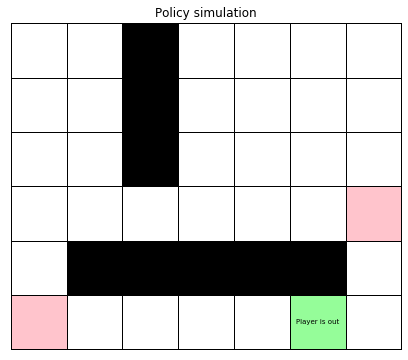

In [15]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

method = 'ValIter';
start  = (0,0);
path = env.simulate(start, policy, method)
# Show the shortest path 
mz.animate_solution(maze, path)

# Problem 2 : Plucking berries

### The new MDP formulation 

In this problem, the introduction of weights is translated in our previous MDP formulation by a modification of the rewards $\mathcal{R}$. This is done by simply setting $r(s,a)$ to $w_{ij}$ if being in state $s$ and taking action $a$ leads to being in th new state $s'=(i,j)$. 

In [16]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 0, 0, 0, 0,  0],
    [ 0, 1, 1, 1, 1, 1,  0],
    [ 0, 0, 0, 0, 0, 2,  0]
])

# Description of the weight matrix as a numpy array
w = np.array([
    [0,    1, -100,   10,   10,   10, 10],
    [0,    1, -100,   10,    0,    0, 10],
    [0,    1, -100,   10,    0,    0, 10],
    [0,    1,    1,    1,    0,    0, 10],
    [0, -100, -100, -100, -100, -100, 10],
    [0,    0,    0,    0,    0,   11, 10]
])

In [17]:
# Create an environment maze
env = mz.Maze(maze, weights=w)
# env.show()

### Dynamic programming 

Run the following python code to obtain the optimal solution of the newly formulated MDP with dynamic programming.

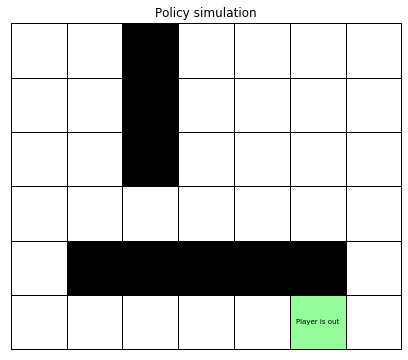

In [18]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path = env.simulate(start, policy, method);
# Show the shortest path 
mz.animate_solution(maze, path)

> **Note:** By changing the horizon from $20$ to $12$ you should observe that the optimal policy changes.  

### Value iteration  

Run the following python code to obtain the optimal solution of the newly formulated MDP with value iteration.

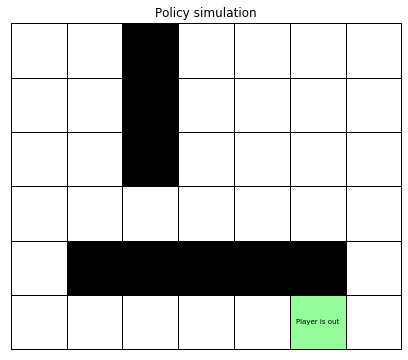

In [19]:
# Discount Factor 
gamma   = 0.50; 
# Accuracy treshold 
epsilon = 0.001;
V, policy = mz.value_iteration(env, gamma, epsilon)
method = 'ValIter';
start  = (0,0);
path = env.simulate(start, policy, method)
# Show the shortest path 
mz.animate_solution(maze, path)

#Problem 3: Bank Robber (Reloaded)

#### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and the minotaur in the maze. Note that we exclude states where the player is on an obstacles' position since this is an impossible state. We do, however, permit the player to be in the same position as the minotaur, as this possible (the reward for this state will reflect the fact that this is an undesirable state.

$$\mathcal{S} = \big\lbrace ((i_r,j_r),(i_p,j_p))\big\rbrace.$$
> **Note:** $\mathcal i_a and j_a$ represents the position of the agent. $\mathcal i_m and j_m$ represents the position of the minotaur.



In [4]:
import numpy as np

In [87]:
import numpy as np
import random

class Bank_Rob:
    def __init__(self, maze, init_pos):
        self.maze = maze
        self.size = maze.shape
        self.current_pos = start_pos
        self.state = self.build_state()
        self.action = ['still', 'left', 'right', 'up', 'down']
        self.action_size = len(self.action)
        
    def build_state(self):
        state_list = []
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                for k in range(self.size[0]):
                    for l in range(self.size[1]):
                        state_list.append([(i,j),(k,l)])
                        
        return state_list

    def police_policy(self):
        actions = self.action
        pos = self.current_pos[1]
        if pos[0] == 0:
            actions.remove('left')
        elif pos[0] == 3:
            actions.remove('right')
        if pos[1] == 0:
            actions.remove('up')
        elif pos[1] == 3:
            actions.remove('down')
        selector = random.randint(0,len(actions))
        sel_action = actions[selector]
        return sel_action

    def robber_policy(self):
        #TODO: how will we make a policy and apply here?
        sel_action = random.randint(0,4)
        return sel_action

    def move(self, selected_action, current_position):
        if selected_action == 'left':
            current_position[0] -= 1
        elif selected_action == 'right':
            current_position[0] += 1
        elif selected_action == 'up':
            current_position[1] -= 1
        elif selected_action  == 'down':
            current_position[1] += 1
        else:
            pass
        
    def check_reward(self):
        pos_robber = self.current_pos[0] 
        pos_police = self.current_pos[1]
        if pos_robber == pos_robber:
            rwd = -10
            keep_robbing = False
        elif pos_robber == (1,1):
            rwd = 1
            keep_robbing = True
        else :
            rwd = 0
            keep_robbing = True            
        return rwd, keep_robbing
    
    def Q_learning(self):
        #Todo: Q learning study and code it !!!!!!!!
        keep_robbing = True
        reward = 0
        while(keep_robbing):
            police_action = self.police_policy()
            self.move(police_action, current_position[1])
            collected_reward, keep_robbing = self.check_reward()
            reward += collected_reward
                    

In [62]:
maze = np.array([
    [ 0, 0, 0, 0],
    [ 0, 1, 0, 0],
    [ 0, 0, 0, 0],
    [ 0, 0, 0, 0]
])
start_pos = [(0,0),(3,3)]

In [60]:
rob_bank = Bank_Rob(maze, start_pos)